## from https://web.stanford.edu/~boyd/papers/admm/

# Code

In [1]:
code = grabcode("https://web.stanford.edu/~boyd/papers/admm/huber/huber_fit.html")


code =

    'function [x, history] = huber_fit(A, b, rho, alpha)
     % huber_fit  Solves a robust fitting problem
     %
     % [z, history] = huber_fit(A, b, rho, alpha);
     % 
     % solves the following problem via ADMM:
     %
     %   minimize 1/2*sum(huber(A*x - b))
     %
     % with variable x.
     %
     % The solution is returned in the vector x.
     %
     % history is a structure that contains the objective value, the primal and 
     % dual residual norms, and the tolerances for the primal and dual residual 
     % norms at each iteration.
     % 
     % rho is the augmented Lagrangian parameter. 
     %
     % alpha is the over-relaxation parameter (typical values for alpha are 
     % between 1.0 and 1.8).
     %
     %
     % More information can be found in the paper linked at:
     % http://www.stanford.edu/~boyd/papers/distr_opt_stat_learning_admm.html
     %
     
     t_start = tic;
     
     %% Global constants and defaults
     
     QUIET    = 0;
     MAX

In [2]:
%%file huber_fit.m

function [x, history] = huber_fit(A, b, rho, alpha)
% huber_fit  Solves a robust fitting problem
%
% [z, history] = huber_fit(A, b, rho, alpha);
% 
% solves the following problem via ADMM:
%
%   minimize 1/2*sum(huber(A*x - b))
%
% with variable x.
%
% The solution is returned in the vector x.
%
% history is a structure that contains the objective value, the primal and 
% dual residual norms, and the tolerances for the primal and dual residual 
% norms at each iteration.
% 
% rho is the augmented Lagrangian parameter. 
%
% alpha is the over-relaxation parameter (typical values for alpha are 
% between 1.0 and 1.8).
%
%
% More information can be found in the paper linked at:
% http://www.stanford.edu/~boyd/papers/distr_opt_stat_learning_admm.html
%

t_start = tic;

%% Global constants and defaults

QUIET    = 0;
MAX_ITER = 1000;
ABSTOL   = 1e-4;
RELTOL   = 1e-2;

%% Data preprocessing

[m, n] = size(A);

% save a matrix-vector multiply
Atb = A'*b;


%% ADMM solver

x = zeros(n,1);
z = zeros(m,1);
u = zeros(m,1);

% cache factorization
[L U] = factor(A);

if ~QUIET
 fprintf('%3s\t%10s\t%10s\t%10s\t%10s\t%10s\n', 'iter', ...
   'r norm', 'eps pri', 's norm', 'eps dual', 'objective');
end

for k = 1:MAX_ITER

 % x-update
 q = Atb + A'*(z - u);
 x = U \ (L \ q);

 % z-update with relaxation
 zold = z;
 Ax_hat = alpha*A*x + (1-alpha)*(zold + b);
 tmp = Ax_hat - b + u;
 z = rho/(1 + rho)*tmp + 1/(1 + rho)*shrinkage(tmp, 1 + 1/rho);

 u = u + (Ax_hat - z - b);

 % diagnostics, reporting, termination checks
 history.objval(k)  = objective(z);

 history.r_norm(k)  = norm(A*x - z - b);
 history.s_norm(k)  = norm(-rho*A'*(z - zold));

 history.eps_pri(k) = sqrt(n)*ABSTOL + RELTOL*max([norm(A*x), norm(-z), norm(b)]);
 history.eps_dual(k)= sqrt(n)*ABSTOL + RELTOL*norm(rho*u);


 if ~QUIET
     fprintf('%3d\t%10.4f\t%10.4f\t%10.4f\t%10.4f\t%10.2f\n', k, ...
         history.r_norm(k), history.eps_pri(k), ...
         history.s_norm(k), history.eps_dual(k), history.objval(k));
 end


 if history.r_norm(k) < history.eps_pri(k) && ...
    history.s_norm(k) < history.eps_dual(k);
     break
 end

end

if ~QUIET
 toc(t_start);
end

end

function p = objective(z)
 p = ( 1/2*sum(huber(z)) );
end

function z = shrinkage(x, kappa)
 z = pos(1 - kappa./abs(x)).*x;
end

function [L U] = factor(A)
 [m, n] = size(A);
 if ( m >= n )    % if skinny
    L = chol( A'*A, 'lower' );
 end

 % force matlab to recognize the upper / lower triangular structure
 L = sparse(L);
 U = sparse(L');
end

Created file '/home/wenh06/Jupyter/wenhao/workspace/fl_seminar/code/boyd-admm/huber_fit.m'.


# Examples

In [3]:
eg_code = grabcode("https://web.stanford.edu/~boyd/papers/admm/huber/huber_fit_example.html")


eg_code =

    '% Huber function fitting example
     
     %% Generate problem data
     randn('seed', 0);
     rand('seed',0);
     
     m = 5000;       % number of examples
     n = 200;        % number of features
     
     x0 = randn(n,1);
     A = randn(m,n);
     A = A*spdiags(1./norms(A)',0,n,n); % normalize columns
     b = A*x0 + sqrt(0.01)*randn(m,1);
     b = b + 10*sprand(m,1,200/m);      % add sparse, large noise
     
     %% Solve problem
     
     [x history] = huber_fit(A, b, 1.0, 1.0);
     
     %% Reporting
     K = length(history.objval);                                                                                                        
     
     h = figure;
     plot(1:K, history.objval, 'k', 'MarkerSize', 10, 'LineWidth', 2); 
     ylabel('f(x^k) + g(z^k)'); xlabel('iter (k)');
     
     g = figure;
     subplot(2,1,1);                                                                                                                    
     semilogy(1:K,

### Generate problem data

#### required: install cvx from http://cvxr.com/cvx/download/

In [4]:
randn('seed', 0);
rand('seed',0);

m = 5000;       % number of examples
n = 200;        % number of features

x0 = randn(n,1);
A = randn(m,n);
A = A*spdiags(1./norms(A)',0,n,n); % normalize columns
b = A*x0 + sqrt(0.01)*randn(m,1);
b = b + 10*sprand(m,1,200/m);      % add sparse, large noise

In [7]:
?norms

### Solve problem

In [5]:
[x history] = huber_fit(A, b, 1.0, 1.0);

iter	    r norm	   eps pri	    s norm	  eps dual	 objective
  1	   15.4154	    0.7767	    5.1477	    0.1556	    642.51
  2	    2.5360	    0.7767	    4.1103	    0.1589	    827.60
  3	    2.2591	    0.7767	    2.1831	    0.1554	    833.26
  4	    1.2350	    0.7767	    1.1045	    0.1544	    832.93
  5	    0.6256	    0.7767	    0.5544	    0.1542	    832.86
  6	    0.3144	    0.7767	    0.2776	    0.1542	    832.87
  7	    0.1575	    0.7767	    0.1389	    0.1542	    832.88
 0.090487 


### Reporting

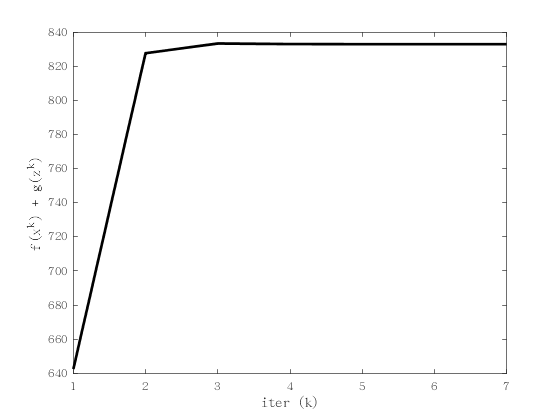

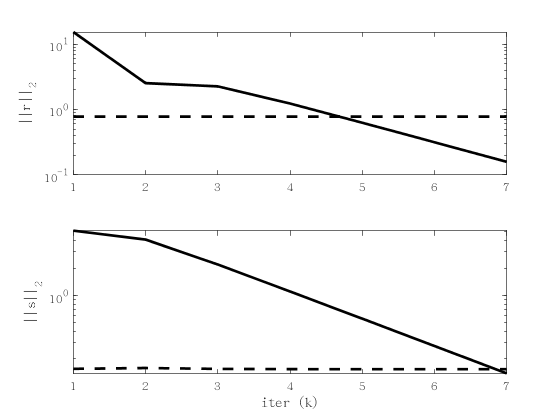

In [6]:
K = length(history.objval);

h = figure;
plot(1:K, history.objval, 'k', 'MarkerSize', 10, 'LineWidth', 2);
ylabel('f(x^k) + g(z^k)'); xlabel('iter (k)');

g = figure;
subplot(2,1,1);
semilogy(1:K, max(1e-8, history.r_norm), 'k', ...
    1:K, history.eps_pri, 'k--',  'LineWidth', 2);
ylabel('||r||_2');

subplot(2,1,2);
semilogy(1:K, max(1e-8, history.s_norm), 'k', ...
    1:K, history.eps_dual, 'k--', 'LineWidth', 2);
ylabel('||s||_2'); xlabel('iter (k)');